In [2]:
from orphics.stats import FisherMatrix
from orphics.stats import corner_plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
### LCDM parameters
h=0.6774 # See README and the accompanying paper regarding the value of h. 
Om = 0.3089
Omh2=(h**2)*Om
Obh2 = 0.02203
Och2 = Omh2-Obh2
ns=0.9667
s8=0.8159
### Hu-Sawicki model parameters
fr0=1e-5
n=1

In [5]:
params = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n', r'b_1']
paramssmall = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n']
paramslittle = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})']

In [22]:
#FisherY10 = np.loadtxt('./Covariance_data/FisherzY10inv.txt')
FisherY10 = np.loadtxt('./Covariance_data/FisherzY10analk03.txt')
FisherY1 = np.loadtxt('./Covariance_data/FisherzY10analk025.txt')
FisherY10k015 = np.loadtxt('./Covariance_data/FisherzY10analk015.txt')
FisherY10eff = np.loadtxt('./Covariance_data/FisherzY10analkeff.txt')
#FisherY1 = np.loadtxt('./Covariance_data/FisherzY1analk03.txt')
#FisherY1 = np.loadtxt('./Covariance_data/FisherzY10anal.txt')
#print (FisherY10/FisherY10eff)

In [23]:
Fishertot = FisherMatrix(FisherY10,params)
#FishertotY1 = FisherMatrix(FisherY10[0:5,0:5],paramssmall)
#FishertotY1 = FisherMatrix(FisherY10[0:4,0:4],paramslittle)
FishertotY1 = FisherMatrix(FisherY1,params)
Fishertoteff = FisherMatrix(FisherY10eff,params)
Fisherk015 = FisherMatrix(FisherY10k015,params)
#fishertry = [Fishertot,FishertotY1]
fishertry = [Fishertot,FishertotY1,Fisherk015]
fishereff = [Fishertot,Fishertoteff]

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/orphics/stats.py:244: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [24]:
labels=[r'Y10 sample, $k_{max}<0.30$ h/Mpc',r'Y10 sample, $k_{max}<0.25$ h/Mpc',r'Y10 sample, $k_{max}<0.15$ h/Mpc']
labels2=[r'Y10 sample, $k_{max}<0.30$ h/Mpc',r'Y10 sample $V_{eff}$ h/Mpc']
#labels=[r'Y10 sample, $k_{max}<0.3$ h/Mpc']#,r'Y1 sample, $k_{max}<1$ h/Mpc']
#print (FishertotY1)

In [25]:
fid_dict = {r'\Omega_m h^2' : Omh2, r'\sigma_{8}' : s8, r'n_s' : ns, r'\log(f_{R_0})': -5, r'n' : 1, r'b_1' : 0.95}

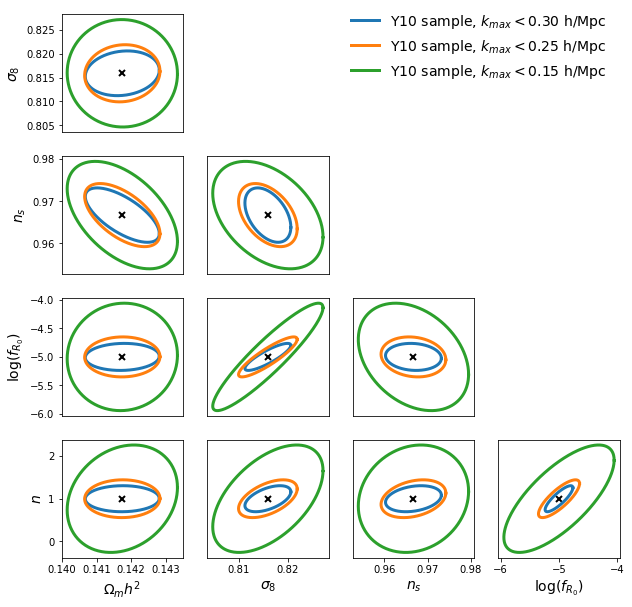

In [26]:
corner_plot(fishertry, labels, fid_dict, paramssmall, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

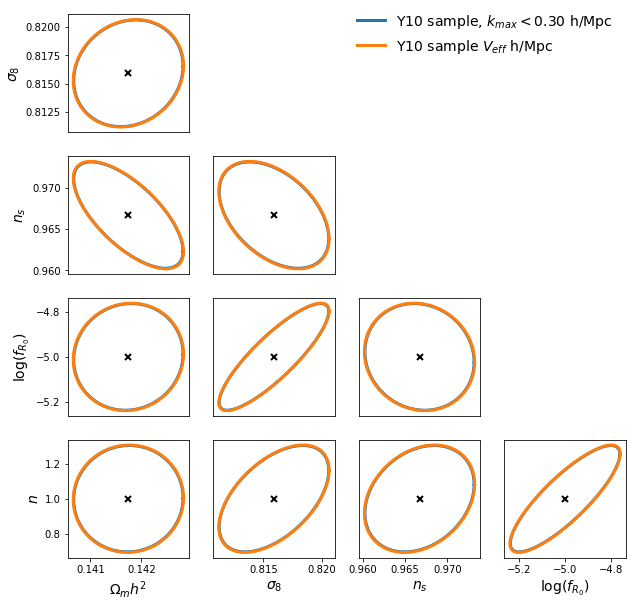

In [21]:
corner_plot(fishereff, labels2, fid_dict, paramssmall, confidence_level=0.683)
#corner_plot(fishertry, labels, fid_dict, paramslittle, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

In [ ]:
FisherY10k03 = np.loadtxt('./Covariance_data/FisherzY10k03.txt')
Fishertotk03 = FisherMatrix(FisherY10k03,params)
fishertryY10 = [Fishertot,Fishertotk03]


In [ ]:
labelsY10 = [r'Y10 sample, $k_{max}<1$ h/Mpc',r'Y10 sample, $k_{max}<0.3$ h/Mpc']
corner_plot(fishertryY10, labelsY10, fid_dict, paramssmall, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()

In [ ]:
print (np.sqrt(np.diag(np.linalg.inv(FisherY10))))

In [ ]:
print (np.sqrt(np.linalg.inv(FisherY1)))

In [ ]:
print (np.sqrt(np.diag(np.linalg.inv(FisherY1))))